# Remote Sensing in the Gulf of Guinea: Lesson 1

## _Reading satellite data contained in a scientific file format._

## Objectives. <a id="section_objectives"></a>

The project participant will learn (1) how scientific data are stored, (2) to use Python 3 to display metadata, (3) to read a netcdf file, and (4) to display this data as a function of latitude and longitude. Some additional information specific to this satellite measurement is presented at the end.

<div class="alert alert-block alert-info">
<b>To obtain credit for this lesson:</b> the project participant must (1) display a regional map of sea surface salinity (SSS) in the Gulf of Guinea (send to instructor as "SSS_map.png") and (2) tell the instructor how far from the coast the data must be in order to be of good quality (in units of kilometers). The project participant will get <b>extra credit</b> if s/he can display a regional map of sea surface temperature (SST) in the Gulf of Guinea (send to instructor as "SST_map.png"). An example is provided below.
</div>

## Description. <a id="section_description"></a>

This script reads in a netcdf file and plots the data.

The file has been downloaded from Remote Sensing Systems (http://www.remss.com/) and contains sea surface salinity (SSS), as well as a few other data products. Below, we look at SSS and the fraction of pixels contaminated by land, zooming into a region known as the Gulf of Guinea. We then plot this as a function of geographic location. Another script (__[Lesson 2](Salinity_GulfOfGuinea_Lesson2.ipynb)__) will make an animation of these data in time.

Christian Buckingham & Eben Nyadjro

## Outline of lesson.

The outline of the less is as follows, where text shown in **bold** denotes where the project participant must send results to the Instructor.

1. [Loading important packages](#section_packages)
1. [Downloading the data (.nc) files](#section_download)
1. [A few notes on our dataset](#section_notes)
1. [Reading the netcdf file](#section_readdata)
1. [Make a global map](#section_globalmap)
1. [**Make a regional map**](#section_regionalmap)
1. [**Dataset limitations: contamination by land**](#section_limitations)
1. [Summary](#section_summary)
1. [Extra: application to sea surface temperature](#section_extra)

<div class="alert alert-block alert-success">
<b>Main question:</b> What controls sea surface salinity in the Gulf of Guinea? We will not answer this question completely but it is worth keeping this in the back of your mind as we work. Here, our emphasis will be on obtaining and reading data.
</div>

## Loading important packages. <a id="section_packages"></a>

First, we load a few important packages. If you do not have these, and if you are using your personal computer and Anaconda as your Python distribution, type **`conda install xarray`** at the terminal window (MacOS, Linux) or command line (Windows). The conda manager package should download it from the internet. If instead you have installed Python a different way, try **`pip install xarray`**.

<div class="alert alert-block alert-warning"><b>Note: </b>If you are executing this code using Google Colab, you will also need to install the `netCDF4` package before loading the important packages. To do this, type `!pip install netCDF4` (The exclamation mark causes the Jupyter notebook to execute this on the computer system that is hosting the Jupyter Notebook. In this case, it executes it on the Google cloud server.)</div>

In [ ]:
# If using Google Colab
# install dependencies.
!pip install netCDF4

In [ ]:
## A few necessary packages.
import numpy as np
from netCDF4 import Dataset #Dataset, MFDataset
import xarray as xr
import matplotlib.pyplot as plt
import datetime as dt
import scipy.signal as signal

## Downloading the data (.nc) files. <a id="section_download"></a>

Before processing these data, we need to first obtain the dataset from the Internet.

Our dataset is developed by Remote Sensing Systems and is described in detail here (http://www.remss.com/missions/smap/salinity/). The present project is making use of sea surface salinity (SSS) so we will download five example netcdf (.nc) files containing these data. To accomplish this, do the following:

1.  navigate to the panels on the left where it says "HTTP Salinity or Wind Speed Data". Click here.
1.  use your cursor to navigate your browser to the subdirectory as follows: SSS/V04.0/FINAL/L3/8day_running/2020/
1.  click on the links to download the last five (5) files.

<div class="alert alert-block alert-info">
<b>Tip:</b> Each file is approximately 12MB. If you feel your Internet connection is not sufficient to obtain 5 files, please contact the Instructor.
</div>

4.  place each file in a known and locatable directory; we will need this location below (see variable `basedirin` below). I placed mine in a directory entitled `data/salinity`.

<div class="alert alert-block alert-warning"><b>Note: If the project participant wishes to obtain all of the salinity data from Remote Sensing Systems (RSS), the user must create an File Transfer Protocol (FTP) account with RSS and then download these data using an FTP software program.</b> We will not do this because it requires disk space and a good Internet connection (about 10GB of network transfer). Had this project been conducted "in-person" the instructors would have provided the project participants with this dataset.</div>

## A few notes about our dataset. <a id="section_notes"></a>

These data are from the Soil Moisture Active Passive (SMAP) sensor. As the satellite orbits Earth, it samples specific locations along its path. This is referred to as the <b>satellite swath</b>. The sensor employed here is a <b>passive sensor</b>, meaning that it examines the electromagnetic radiation emitted from the Earth towards space without sending a signal toward the Earth. (This consumes less power on the satellite, as well.) What is really cool about this sensor is that it it makes measurements in the "microwave" portion of the spectrum, meaning that the satellite can see through the clouds! These data are then combined (averaged) over 8 days and the result is the salinity measurement you will see. More information on the data used in our project can be obtained from the following video: <href><a>https://smap.jpl.nasa.gov/resources/71/smap-globe-program/</a></href> (start from 0:27 seconds or 0:55 seconds and continue watching).

## Read in the data from the netcdf file. <a id="section_readdata"></a>

NetCDF (.nc) is a binary data format that contains not only data but information that describes the data. We refer to this latter type of information as **metadata**.

Below, we use strings to tell Python where to find the file, we display to the screen some of the metadata, and in the final portion, we plot the data itself. Let's first see what the metadata looks like.

<div class="alert alert-block alert-info">
<b>Tip:</b> In addition to metadata, sometimes the netcdf file contains **data provenance**. This is a very fancy word to say "an ability to track where the data came from and what processing steps were done on it." It is not important for this project, but it will make you sound impressive if you talk with other people about this.
</div>

Here, we use the xarray package only to display the contents of the netcdf file in a tidy manner. There are other ways of displaying this information but xarray does a nice job.

In [ ]:
# Define the filename.
pname = "../../data/salinity/" # remember the slash on the end of the pathname
fname = "RSS_smap_SSS_L3_8day_running_2020_199_FNL_v04.0.nc"
infile = pname+fname

# Read the metadata of the file. This is equivalent to an "ncdump -h RSS_smap.nc" command at the terminal
# window or command line.
test = xr.open_dataset(infile,decode_times=False)
print(test.info())

xarray.Dataset {
dimensions:
	lat = 720 ;
	lon = 1440 ;
	time = 1 ;

variables:
	float32 lon(lon) ;
		lon:standard_name = longitude ;
		lon:axis = X ;
		lon:long_name = center longitude of grid cell ;
		lon:units = degrees_east ;
		lon:valid_min = 0.0 ;
		lon:valid_max = 360.0 ;
	float32 lat(lat) ;
		lat:standard_name = latitude ;
		lat:axis = Y ;
		lat:long_name = center latitude of grid cell ;
		lat:units = degrees_north ;
		lat:valid_min = -90.0 ;
		lat:valid_max = 90.0 ;
	float64 time(time) ;
		time:standard_name = time ;
		time:axis = T ;
		time:long_name = reference time of analyzed variable field corresponding to center of the product time interval ;
		time:units = seconds since 2000-01-01T00:00:00Z ;
		time:calendar = standard ;
	float64 nobs(lat, lon) ;
		nobs:long_name = Number of observations for L3 average of SSS smoothed to approx 70km resolution ;
		nobs:units = 1 ;
		nobs:valid_min = 1 ;
		nobs:valid_max = 472 ;
	float64 nobs_40km(lat, lon) ;
		nobs_40km:long_name = Numb

The reason for using the statement `decode_times=False` is that the xarray code naturally wants to interpret the time vector. Sometimes this prevents the code from working on a netcdf file that is not CF-compliant. That is, sometimes it doesn't have the correct standards. So to be general for any netcdf file, we place in the switch `decode_times=False`.

Note that the filename structure can be read as follows:

* **RSS** -- Remote Sensing Systems (dataset producer)
* **smap** -- satellite sensor
* **SSS** -- sea surface salinity in units of grams of salt per kilogram of seawater, often called practical salinity units (psu)
* **L3** -- Level 3 processing; when NASA generates satellite data for the scientific or research community, it has multiple stages or levels of processing:
    * Level 1 -- corresponds to raw data measured by the satellite
    * Level 2 -- corresponds to swath measurements processed into usable measurements (L2C is a useful dataset, for instance)
    * Level 3 -- corresponds to swath measurements but that are placed into a map projection, such as a rectangular
      and longitude grid.
* **8day_running** -- 8-day running or moving average
* **2020** -- year
* **199** -- day of year (use https://www.esrl.noaa.gov/gmd/grad/neubrew/Calendar.jsp?view=DOY&year=2020&col=4 to convert)
* **FNL** -- "final" (not necessary but helpful)
* **v04.0** -- version 4.0 of the processing software used by RSS
* **.nc** -- netCDF, filename extension (similar to how text documents sometimes have an extention .txt)

Now, we read in the netcdf file. This uses a function called **`Dataset`** in the **`netCDF4`** package.

In [ ]:
# Read in the data from the netcdf file.
# We use the netCDF4 package to read the netcdf file.
nc = Dataset(infile, "r")
etime = nc.variables["time"][:] # time in seconds since 2000/01/00 00:00
lat = nc.variables["lat"][:] # latitude (degrees), values = [-90, 90]
lon = nc.variables["lon"][:] # longitude (degrees), values = [0, 360]
nobs = nc.variables["nobs"][:] # Number of observations for L3 average (unitless)
sss_smap = nc.variables["sss_smap"][:] # sea_surface_salinity (practical salinity units == unitless)
sss_ref = nc.variables["sss_ref"][:] # Reference sea surface salinity from HYCOM (practical salinity units == unitless)
gland = nc.variables["gland"][:] # average land fraction (weighted by antenna gain)
sst_ref = nc.variables["surtep"][:] # Ancillary sea surface temperature (from Canada Meteorological Center), doi: 10.5067/GHCMC-4FM03

# Access the "data" portion of the variable, as python handles this as a masked array.
etime = etime.data
lat = lat.data
lon = lon.data
sss = sss_smap.data
sss_hycom = sss_ref.data
sst_cmc = sst_ref.data
land_fraction = gland.data

# Collapse data to one dimension.
#etime = np.squeeze(etime)
#lat = np.squeeze(lat)
#lon = np.squeeze(lon)

# Print some info about the variables.
print(etime.dtype) # print the data type
print(etime.shape) # print the shape
print(lat.dtype) # print the data type
print(lat.shape) # print the shape
print(lon.dtype) # print the data type
print(lon.shape) # print the shape
print(sss.dtype) # print the data type
print(sss.shape) # print the shape
print(sss_hycom.dtype) # print the data type
print(sss_hycom.shape) # print the shape


float64
(1,)
float32
(720,)
float32
(1440,)
float32
(720, 1440)
float32
(720, 1440)


In [ ]:
# Convert some variables to double precision (float64).
lat = np.double(lat)
lon = np.double(lon)
sss = np.double(sss)

nlat = len(lat)
nlon = len(lon)
sdata = sss.shape

In [ ]:
# Handle time.

# This is really more tricky than it seems.
# Keeping track of time and converting between time units is one of the
# most tricky things in python (and in most computer languages). Thus,
# for now, we will simple convert to years since the reference time.

# Simple manner of handling time.
dtime = etime/86400 # convert seconds to days since ...
ytime = dtime/366 # convert from days to years

## Make a global map. <a id="section_globalmap"></a>

Now that we have the data, plot it as a global map. (This takes a few minutes because of the density of data points.)

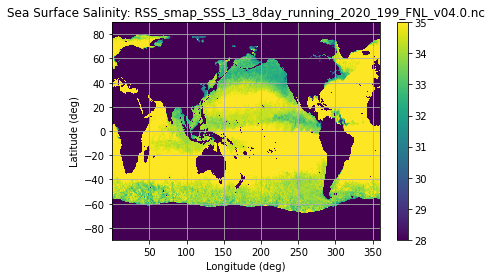

In [ ]:
# Plot the salinity.
plt.pcolor(lon,lat,sss)
plt.clim(28,35)
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.title('Sea Surface Salinity: '+fname) # here we need to insert a date inside the brackets
plt.grid()
plt.colorbar()
plt.show()

## Make a regional map. <a id="section_regionalmap"></a>

We now want to subset the global map. We examine a region centred on the Gulf of Guinea (GoG). The challenge with this particular location is that the data is given to us from the prime meridian (longitude = 0 degrees) to 360 degrees. That is, the region of the GoG falls on the "*_seam_*" or edge of the data. (See how the GoG is both on the left-hand side of the plot and the right-hand side of the plot.) To handle this, we add two halves of data (below, referred to as *blocks*) to a single matrix, creating one large matrix. The latitudes are the same for both *blocks*.

In [ ]:
# This part is tricky because we need to obtain data across the seam.

# Subset for the region of interest.
latlim = np.array([-10.0,10.0])
lonlim = np.array([-20.0,15.0])
# latlim = np.array([4.25,6.25])
# lonlim = np.array([-1,1])
latlim = np.double(latlim)
lonlim = np.double(lonlim)
ilat1 = (lat >= latlim[0]) & (lat <= latlim[1])
ilon1 = ((lon-360.0) >= lonlim[0]) & ((lon-360.0) < 0.);
ilon2 = (lon >= 0) & (lon <= lonlim[1])
ilat = ilat1;
ilon = np.concatenate((ilon1,ilon2), axis=0)

lats = lat[ilat1]
lons1 = lon[ilon1] - 360
lons2 = lon[ilon2]
lons = np.concatenate((lons1,lons2), axis=0)

index1 = np.array(np.where(ilat))
index2 = np.array(np.where(ilon))
#print(index1)
#print(index2)
sss_block1 = sss[ilat,:]
sss_block1 = sss_block1[:,ilon1]
sss_block2 = sss[ilat,:]
sss_block2 = sss_block2[:,ilon2]

nlats = len(lats)
nlons = len(lons)
nlons1 = len(lons1)
nlons2 = len(lons2)
sss_block = np.zeros([nlats,nlons])
sss_block[0:nlats,0:nlons1] = sss_block1
sss_block[0:nlats,nlons1:nlons1+nlons2] = sss_block2

# Form a mask for the land.
# This mask uses the bad salinity values to identify land.
mask = np.zeros([nlats,nlons])
igood = (sss_block >= 10) # find good salinity values
mask[igood] = 1
inan = (sss_block < 10) # find bad values
mask[inan] = np.nan # not a number

We will now plot the sea surface salinity for a single day. Fresh water (low salinity) is depicted as dark blue. Note, **there seems to be a lot of fresh water emanating from the coastline and which is likely due to the Congo and Niger rivers.** Also note, we are multiplying by the mask (nans where data is bad, ones where it is good) to distinguish between bad measurements and good measurements. It also shows land as white, which is helpful.

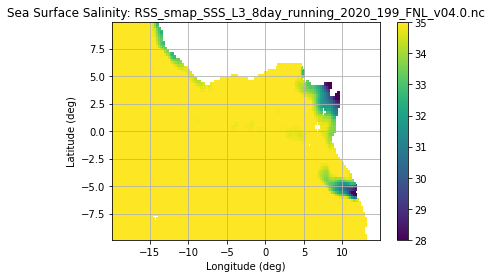

In [ ]:
# Plot the salinity.
plt.pcolor(lons,lats,sss_block*mask)
plt.clim(28,35)
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.title('Sea Surface Salinity: '+fname) # here we need to insert a date inside the brackets
plt.grid()
plt.colorbar()
plt.show()

### Save the plot or map to a file. <a id="section_saveplot"></a>

We can also save this picture above to a file. For example, using the above code, we would need to comment the statement `plt.show()` and then replace this with two extra lines of code. This saves the graphic to a file called `SSS_map.png` which is located in the same directory as the Jupyter Notebook.

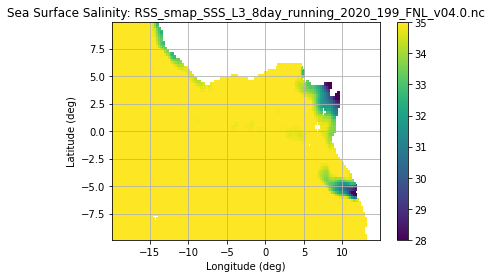

In [ ]:
# Plot the salinity.
plt.pcolor(lons,lats,sss_block*mask)
plt.clim(28,35)
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.title('Sea Surface Salinity: '+fname) # here we need to insert a date inside the brackets
plt.grid()
plt.colorbar()
#plt.show()
outfile = "SSS_map.png"
plt.savefig(outfile,format='png',dpi=200)

## Dataset limitations: contamination by land. <a id="section_limitations"></a>

The following plot examines how the salinity values are contaminated by radiation from the land. This happens for microwave-derived salinity measurements because it is a passive sensor, and the radiation from satellite TV antennas and other technology tend to bias the results. So, whoever created the netcdf file was aware of this problem and masked out values of salinity for which the `gland` variable had a value exceeding a given amount.

We don't need to understand the units of this variable (it is multiplied by the antennae gain). For right now, just simply look at the colours: bright (yellow) colours indicate **bias** in the salinity measurements.

In [ ]:
# Look at the fraction of pixels contaminated by land.
land_block1 = land_fraction[ilat,:]
land_block1 = land_block1[:,ilon1]

land_block2 = land_fraction[ilat,:]
land_block2 = land_block2[:,ilon2]

land_block = np.zeros([nlats,nlons]) # allocate space
land_block[0:nlats,0:nlons1] = land_block1
land_block[0:nlats,nlons1:nlons1+nlons2] = land_block2

# Land fraction threshold (in metadata).
land_fraction_threshold = 0.00800000037997961
iland = land_block > land_fraction_threshold # pixels that are land
#mask = np.ones([nlats,nlons])
#mask[iland] = np.nan # not a number

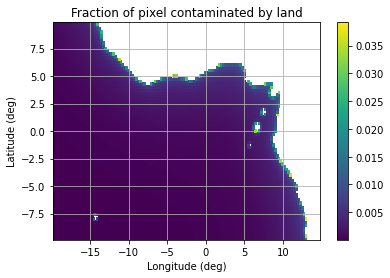

In [ ]:
# Plot the land fraction.
plt.pcolor(lons,lats,(land_block*mask))
#plt.clim(0,1)
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.title('Fraction of pixel contaminated by land')
plt.grid()
plt.colorbar()
plt.show()

<div class="alert alert-block alert-info">
<b>Can you determine how close to the coast you can use these data?</b> Hint: zoom into the coast near Ghana by changing the latitude and longitude limits, `latlim` and `lonlim`, defined above. Then, using the y-axis and recognizing that 1 degree of latitude is approximately 111 km, determine how many kilometers from the coast the data need to be to be of good quality. For additional help, the latitude and longitude of Accra, Ghana is approximately latitude = 5.50 degrees, longitude = -0.02 degrees. So, for example, we would change `latlim` to be `latlim = np.array([4.25,6.25])`.
</div>

If I execute the above code with the latitude and longitude limits changed to be `latlim = np.array([4.25,6.25])` and `lonlim = np.array([-1.0,1.0])`, I get the following result.

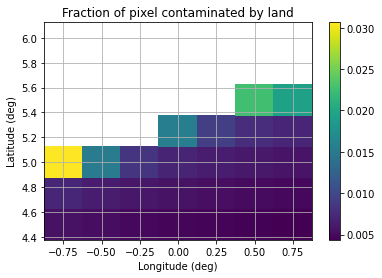

In [ ]:
# Plot the land fraction.
plt.pcolor(lons,lats,(land_block*mask))
#plt.clim(0,1)
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.title('Fraction of pixel contaminated by land')
plt.grid()
plt.colorbar()
plt.show()

This is actually not bad at all! The previous version of these data (version 3.0) had more contamination near the coast. The present version of these data (version 4.0) has only minimal contamination near the coast.

## Summary. <a id="section_summary"></a>

<div class="alert alert-block alert-success">
<b>Congratulations!</b> You have finished the lesson!
</div>

It is worth looking back on our lesson to summarize what we have learned.
1.  We have obtained five satellite data files containing sea surface salinity (SSS) from Remote Sensing Systems
1.  We have learned to read in a single file in a scientific data format (NetCDF or .nc)
1.  We have learned to examine the **metadata** and, to use the fancy phrase, **data provenance**.
1.  We have learned to plot these data on a map (Dr. Paige Martin's lessons provide improved examples of this using basemap)
1.  We have learned to examine data in the Gulf of Guinea
1.  We now understand that the data is of poor quality near to the coast owing to contamination from other electromagnetic radiation

The project participant (you) should, for example, be able to apply it to another data set. This can be tricky but, below, we encourage the researcher/scientist to apply these to sea surface temperature (SST) in the Gulf of Guinea.

## Extra: Application to sea surface temperature. <a id="section_extra"></a>

<div class="alert alert-block alert-info">
<b>Note: the following is not necessary</b> but it will help you. It demonstrates to the instructor that you understand the material because, if working on your own, you would be able to read any satellite data in netcdf format without a problem.
</div>

Try the following data file, for example. It is a sea surface temperature (SST) file created by RSS:

http://data.remss.com/SST/daily/mw_ir/v05.0/netcdf/2020/20200717120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc

When finished, send a "png" file of the map of SST (**zoom in on the Gulf of Guinea**) to the instructor. _It can be a little tricky_! so a few tips are given in a separate document.

#### Example: SST map valid on May 15, 2020

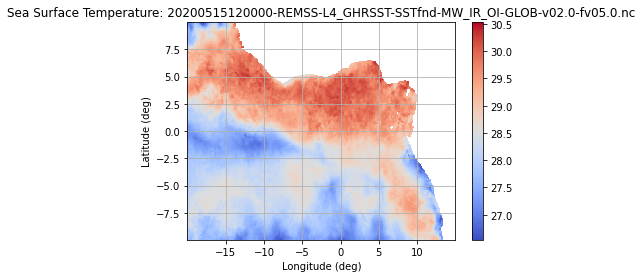

In [ ]:
# Plot the sea surface temperature.
plt.pcolor(lons,lats,sst_block*mask,cmap="coolwarm")
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.title('Sea Surface Temperature: '+fname) # here we need to insert a date inside the brackets
plt.grid()
plt.colorbar()
outfile = "SST_map.png"
plt.savefig(outfile,format='png',dpi=200)

# Note that we had to get rid of the plt.show() command.
# Please ask Dr. Paige Martin why this is.